# Import packages

In [1]:
# Reading/Writing Data
import os
import glob
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt

# Pytorch
import torch 
from torch.utils.data import DataLoader, random_split

# Self-Defined Package
from SMAPDataset import SMAPDataset
from SMCNN import SMCNN
from Preprocessing import random_spatial_sequence, collate_fn

C:\Users\jianer\anaconda3\envs\datamining\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Some Utility Functions

In [3]:
def same_seed(seed): 
    '''Fixes random number generator seeds for reproducibility.'''
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Configurations
`config` contains hyper-parameters for training and the path to save your model.

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 11611801,      # Your seed number, you can pick your lucky number. :)
    'is_train': True,
    'test_batch_size': 2195,
    'ati_rate': 'ALL',
    'root': 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\DATASET\\AB',
    'model_save_dir': 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\DATASET\\AB\\OUTPUT\\MODELS\\CNN_FROM_UPSCALING'
}

In [5]:
# # Set seed for reproducibility
same_seed(config['seed'])

In [6]:
print(config['root'])
# 创建数据集
insitu_dataset = SMAPDataset(config['root'], ati_rate=config['ati_rate'], insitu_validation=False)
# 创建数据加载器
insitu_loader = DataLoader(insitu_dataset, batch_size=config['test_batch_size'], shuffle=False, collate_fn=collate_fn)

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL
***************************Load data path******************************
valid day sequence: ['2015091', '2015104', '2015106', '2015114', '2015115', '2015117', '2015128', '2015130', '2015131', '2015136', '2015138', '2015141', '2015149', '2015154', '2015157', '2015160', '2015162', '2015163', '2015165', '2015171', '2015176', '2015186', '2015187', '2015189', '2015194', '2015195', '2015197', '2015200', '2015202', '2015203', '2015205', '2015208', '2015211', '2015213', '2015216', '2015221', '2015226', '2015229', '2015232', '2015234', '2015235', '2015237', '2015242', '2015243', '2015258', '2015259', '2015261', '2015267', '2015272', '2015275', '2015277', '2015280', '2015282', '2015283', '2015285', '2015288', '2015290', '2015291', '2015296', '2015325', '2015330', '2015333']
_______________________________2015091________________

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015131\40.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\40.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015131\40.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015131\40.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015131\40.npy
_____________________________smap cell: 41_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015131\41.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\41.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015131\41.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015131\41.npy
D:

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\56.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015171\56.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015171\56.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015171\56.npy
_____________________________smap cell: 57_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015171\57.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\57.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015171\57.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015171\57.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015171\5

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015203\29.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\29.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015203\29.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015203\29.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015203\29.npy
_____________________________smap cell: 34_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015203\34.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\34.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015203\34.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015203\34.npy
D:

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015232\11.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015232\11.npy
_____________________________smap cell: 12_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015232\12.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\12.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015232\12.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015232\12.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015232\12.npy
_____________________________smap cell: 13_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015232\13.npy
D:\1GRADUATED\paper\down

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\13.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015277\13.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015277\13.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015277\13.npy
_____________________________smap cell: 14_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015277\14.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\14.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015277\14.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015277\14.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015277\1

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015291\44.npy
_____________________________smap cell: 45_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015291\45.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\45.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\NDVI\GRID\2015291\45.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\SMAP\2015291\45.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\LABEL\ATI\GRID_ALL\2015291\45.npy
_____________________________smap cell: 46_____________________________
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\SMAP\2015291\46.npy
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\DATASET\AB\INPUT\TEXTURE\46.npy
D:\1GRADUATED\paper\downscali

In [7]:
print(len(insitu_dataset))

2195


In [8]:
import datetime

# The index of day start from 1
# day 从 1 开始
def date2day(date, fm="%Y-%m-%d"):
    date_object = datetime.datetime.strptime(date, fm)
    day_of_year = date_object.timetuple().tm_yday
    return day_of_year

def day2date(year, day):
    date = datetime.datetime(year, 1, 1) + datetime.timedelta(day - 1)
    month = date.month
    day = date.day
    return date

In [9]:
def tester(test_loader, model, config, device):
    relu = torch.nn.ReLU(inplace=True)
#     criterion = ab_physics_loss
    model.eval()
    pred_pkg = {'date':[], 'smapid':[], 'a': [], 'b': [], 'smap': [], 'downscaling_id':[], 'downscaling_grid':[]}
    pred_list = np.zeros((len(test_loader), 2))
    
    for i, data_pkg in enumerate(test_loader):
        x = data_pkg['processed_data']
        label_data = data_pkg['label_data']
        meta_data = data_pkg['meta_data']
#         print(label_data)
#         print(meta_data)
        with torch.no_grad():
            pred_ab = model(x)
            relu(pred_ab[:, 0])
#             x, pred = x.to(device), pred.to(device)  
            
        # 获取smap
        smap = label_data['smap']
        # 获取ati_grid
        ati_grid = label_data['ati_grid']

        # 创建一个形状与 ati_grid 中二维张量相同的二值张量 ati_valid
        ati_valid = torch.zeros_like(ati_grid, dtype=torch.float32)

        # 遍历 ati_grid 中的每个二维张量，将其转换成对应的二值矩阵
        for i in range(ati_valid.size(0)):
            ati_valid[i] = (ati_grid[i] != 0).type(torch.float32)

        # 创建一个与 smap 形状相同的全零张量 pred_smap
        smap_downscaling = torch.zeros_like(ati_grid, dtype=torch.float32)
        # 计算 smap_downscaling，并将其保存在 pred_smap 中
        for i in range(pred_ab.size(0)):
            a, b = pred_ab[i]
            smap_downscaling[i] = torch.mul(a * ati_grid[i] + b, ati_valid[i])
        
        # 装袋数据
        pred_pkg['downscaling_grid'] = smap_downscaling
        pred_pkg['downscaling_id'] = [i for i in range(smap_downscaling.size(0))]
        pred_pkg['smap'] = np.asarray(label_data['smap'][:, 0])
        pred_pkg['a'] = pred_ab[:, 0]
        pred_pkg['b'] = pred_ab[:, 1]
        
        for i in pred_pkg['downscaling_id']:
            pred_pkg['date'].append(meta_data[i]['date'])
            pred_pkg['smapid'].append(int(meta_data[i]['smapid']))
        print(len(pred_pkg['date']), len(pred_pkg['smapid']), len(pred_pkg['a']), len(pred_pkg['b']), len(pred_pkg['smap']), len(pred_pkg['downscaling_id']))
    return pred_pkg

In [10]:
param_path = os.path.join(config['model_save_dir'], 'first.ckpt' )
print(insitu_dataset.get_input_shape(0))
model = SMCNN(input_channel=insitu_dataset.get_input_shape(0)[2]).to(device)
print(model)
model.load_state_dict(torch.load(param_path))
pred_pkg = tester(insitu_loader, model, config, device) 

(11, 11, 20)
SMCNN(
  (cnn): Sequential(
    (0): Conv2d(20, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3872, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=2, bias=True)
  )
)
2195 2195 2195 2195 2195 2195


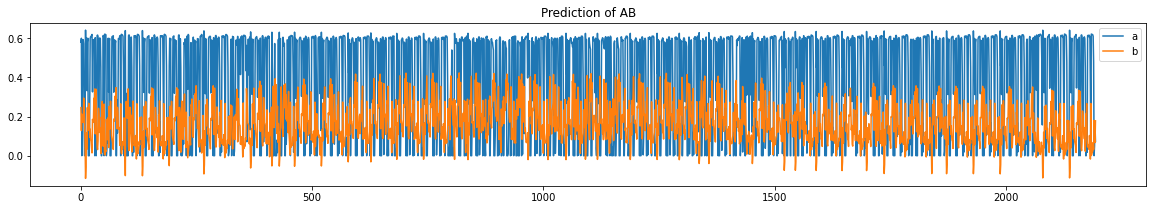

In [11]:
plt.figure(figsize=(20,3))
plt.plot(pred_pkg['a'], label='a')
plt.plot(pred_pkg['b'], label='b')
# 添加标题和标签
plt.title('Prediction of AB')
# plt.xlabel('Index of Model')
plt.legend()
plt.show()

In [12]:
selected_dict = {key: value for key, value in pred_pkg.items() if key not in ['downscaling_grid']}
df = pd.DataFrame(selected_dict)
df = df.sort_values(by='smapid', ascending=True, kind='stable')
df = df.sort_values(by='date', ascending=True, kind='stable')
df = df.reset_index(drop=True)
print(df)
df.info()

         date  smapid         a         b      smap  downscaling_id
0     2015091       6  0.000000  0.184830  0.161882               8
1     2015091      14  0.579794  0.245650  0.177633               0
2     2015091      15  0.599741  0.128366  0.183698               1
3     2015091      16  0.000000  0.212260  0.187394               2
4     2015091      24  0.327863  0.183518  0.194414               3
...       ...     ...       ...       ...       ...             ...
2190  2015333      54  0.620234  0.007873  0.104842            2186
2191  2015333      55  0.618599  0.017489  0.101146            2187
2192  2015333      56  0.617972  0.021174  0.101434            2188
2193  2015333      57  0.610059  0.067698  0.109974            2189
2194  2015333      58  0.478902  0.031420  0.118791            2190

[2195 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ---

In [13]:
for grid in df[df['date']=='2015282']['downscaling_id']:
    print(pred_pkg['downscaling_grid'][grid])

tensor([[0.0628, 0.0640, 0.0637, 0.0632, 0.0633, 0.0627, 0.0626, 0.0630, 0.0665,
         0.0668, 0.0657],
        [0.0647, 0.0651, 0.0657, 0.0651, 0.0630, 0.0629, 0.0629, 0.0632, 0.0656,
         0.0652, 0.0660],
        [0.0652, 0.0649, 0.0655, 0.0000, 0.0000, 0.0000, 0.0000, 0.0632, 0.0655,
         0.0652, 0.0657],
        [0.0647, 0.0645, 0.0644, 0.0654, 0.0000, 0.0000, 0.0000, 0.0649, 0.0653,
         0.0661, 0.0663],
        [0.0639, 0.0634, 0.0639, 0.0649, 0.0000, 0.0000, 0.0000, 0.0000, 0.0661,
         0.0664, 0.0668],
        [0.0624, 0.0625, 0.0628, 0.0627, 0.0633, 0.0640, 0.0643, 0.0657, 0.0662,
         0.0651, 0.0647],
        [0.0632, 0.0626, 0.0624, 0.0620, 0.0619, 0.0000, 0.0622, 0.0624, 0.0625,
         0.0622, 0.0627],
        [0.0634, 0.0627, 0.0631, 0.0626, 0.0621, 0.0000, 0.0629, 0.0626, 0.0622,
         0.0623, 0.0626],
        [0.0629, 0.0624, 0.0620, 0.0622, 0.0629, 0.0633, 0.0629, 0.0628, 0.0630,
         0.0631, 0.0624],
        [0.0626, 0.0624, 0.0623, 0.06

In [14]:
df[df['date']=='2015282']

,date,smapid,a,b,smap,downscaling_id
1736,2015282,1,0.146635,0.056647,0.143850,1736
1737,2015282,2,0.595367,0.154086,0.145141,1747
1738,2015282,3,0.600806,0.122103,0.144455,1758
1739,2015282,4,0.603113,0.108543,0.145391,1769
1740,2015282,5,0.600724,0.122588,0.144831,1780
1741,2015282,6,0.000000,0.195795,0.176881,1790
1742,2015282,7,0.018762,0.165355,0.176182,1791
1743,2015282,8,0.124307,0.085697,0.173366,1792
1744,2015282,9,0.056340,0.201406,0.168209,1793
1745,2015282,10,0.637034,-0.090909,0.175063,1737


##  按日期可视化降尺度结果

In [15]:
from osgeo import gdal
smapid_root = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\SMAP_Babao.tif'
smap_dataset = gdal.Open(smapid_root)
smapid_mat = []
for i in range(smap_dataset.RasterCount):

    # 获取当前波段
    band = smap_dataset.GetRasterBand(i+1)

    # 将波段数据读入 NumPy 数组
    smapid_mat = band.ReadAsArray()

    # 获取无数据值
#     nodata_value = band.GetNoDataValue()
#     将数据中的无数据值替换为np.nan
#     data[data == nodata_value] = np.nan
print(smapid_mat)

[[-128 -128    1    2    3    4    5 -128 -128 -128 -128 -128 -128]
 [   6    7    8    9   10   11   12   13 -128 -128 -128 -128 -128]
 [  14   15   16   17   18   19   20   21   22   23 -128 -128 -128]
 [  24   25   26   27   28   29   30   31   32   33   34   35 -128]
 [-128 -128   36   37   38   39   40   41   42   43   44   45   46]
 [-128 -128 -128 -128 -128 -128   47   48   49   50   51   52   53]
 [-128 -128 -128 -128 -128 -128 -128   54   55   56   57   58 -128]]


2015091


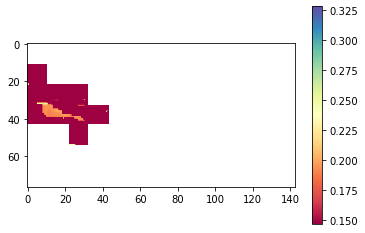

2015104


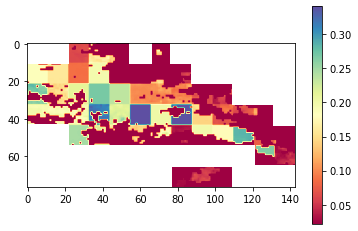

2015106


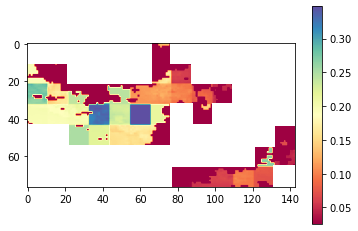

2015114


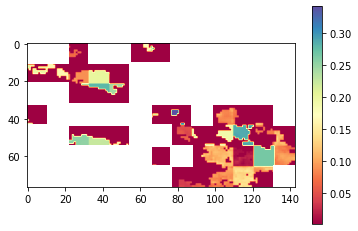

2015115


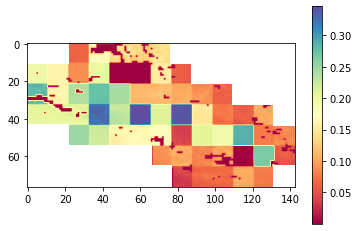

2015117


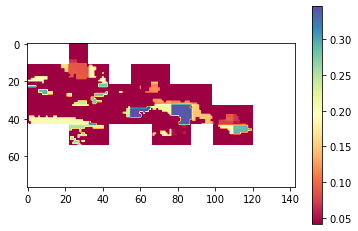

2015128


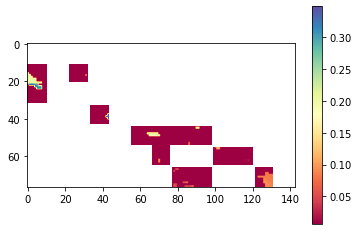

2015130


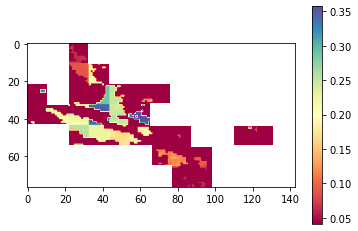

2015131


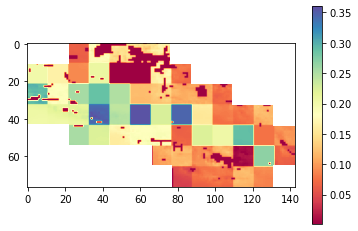

2015136


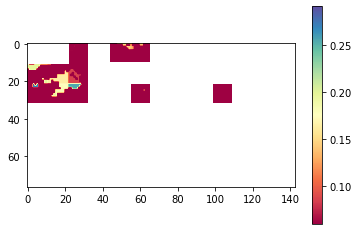

2015138


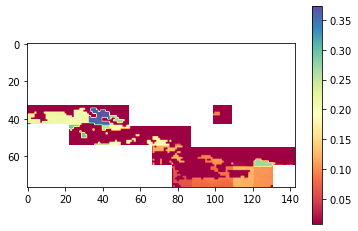

2015141


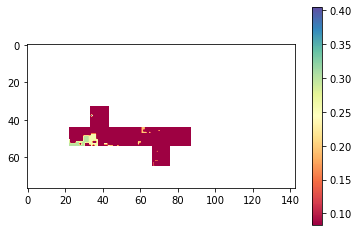

2015149


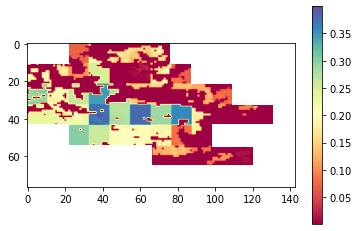

2015154


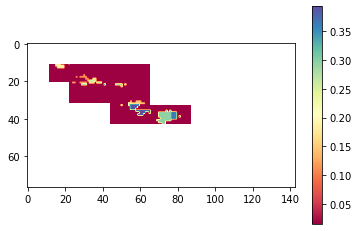

2015157


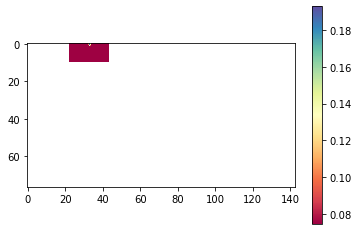

2015160


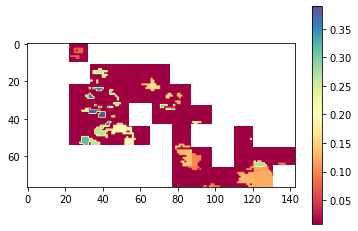

2015162


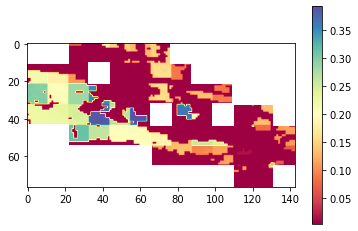

2015163


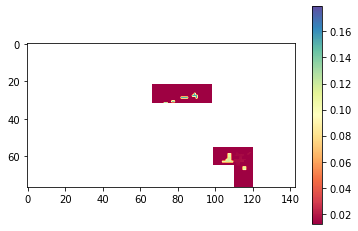

2015165


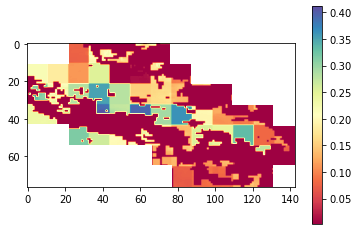

2015171


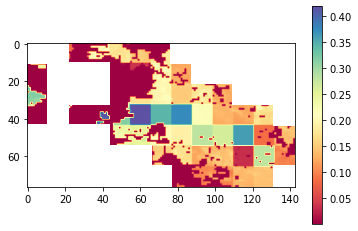

2015176


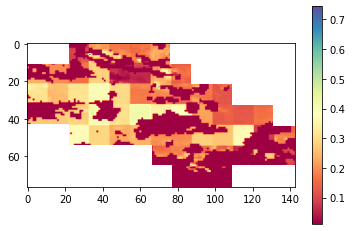

2015186


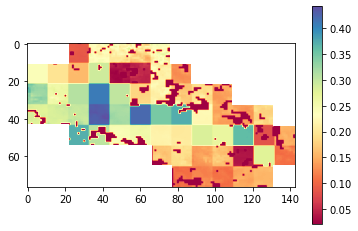

2015187


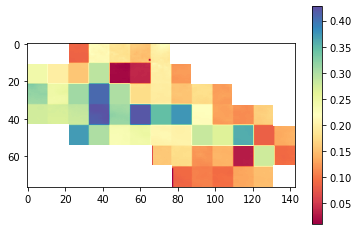

2015189


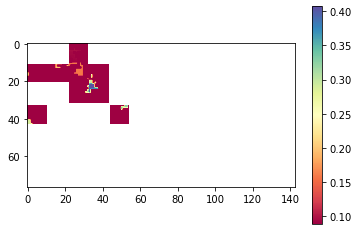

2015194


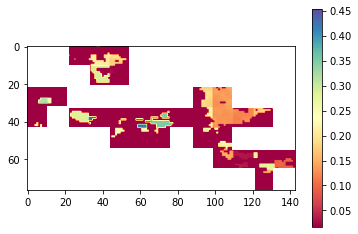

2015195


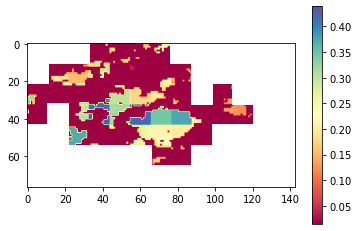

2015197


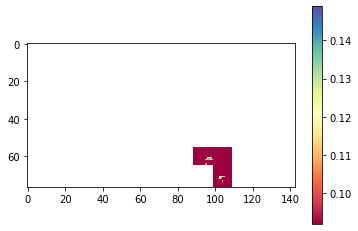

2015200


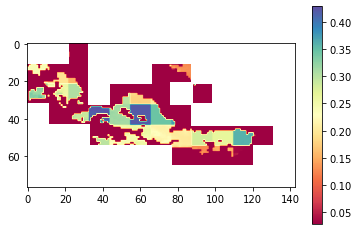

2015202


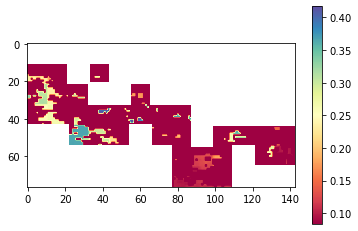

2015203


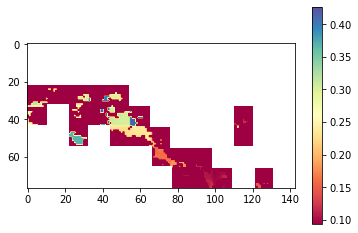

2015205


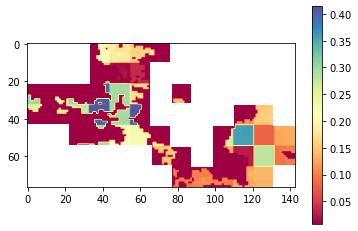

2015208


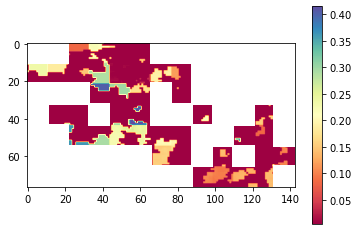

2015211


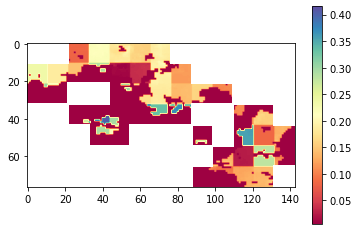

2015213


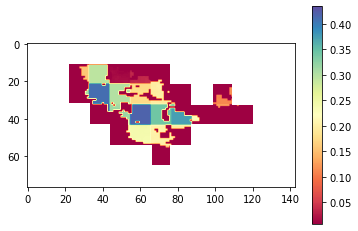

2015216


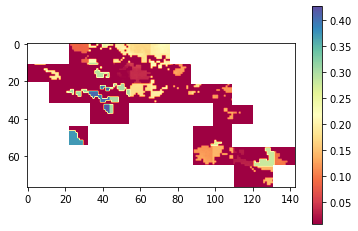

2015221


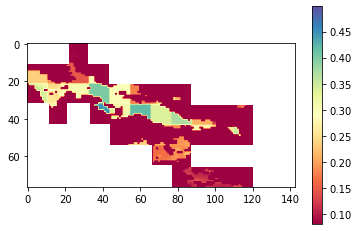

2015226


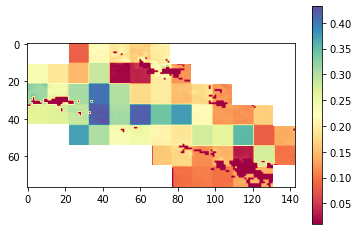

2015229


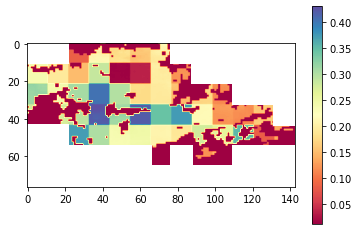

2015232


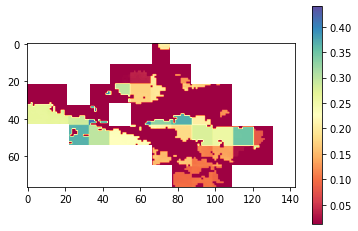

2015234


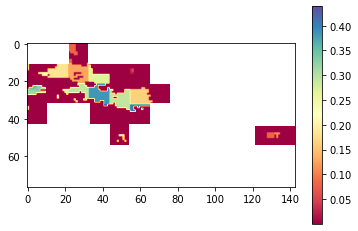

2015235


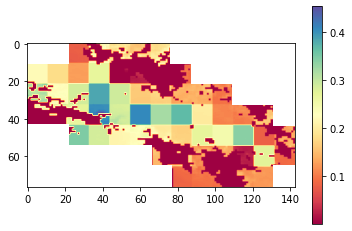

2015237


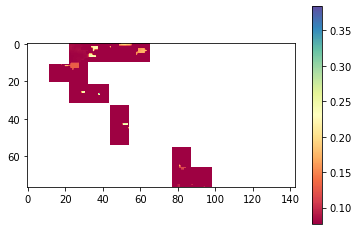

2015242


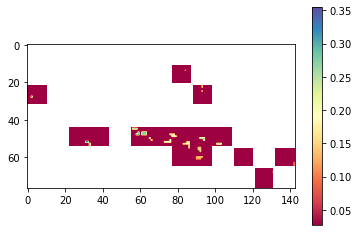

2015243


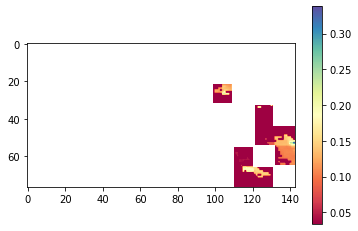

2015258


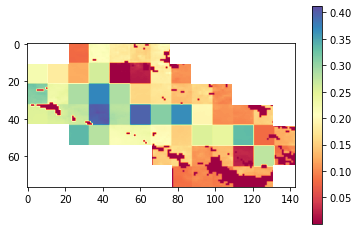

2015259


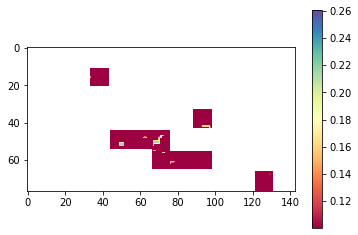

2015261


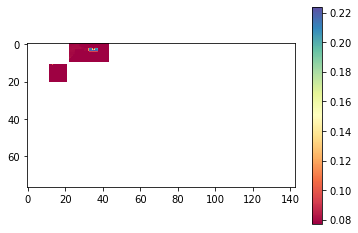

2015267


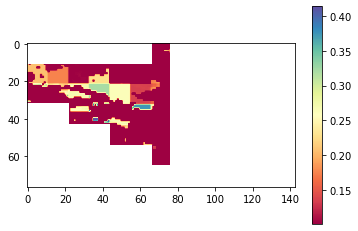

2015272


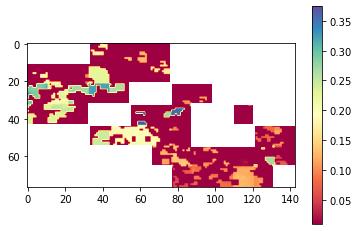

2015275


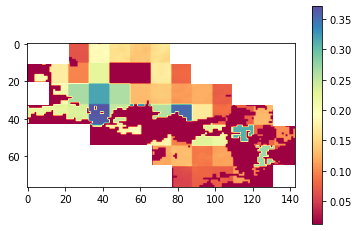

2015277


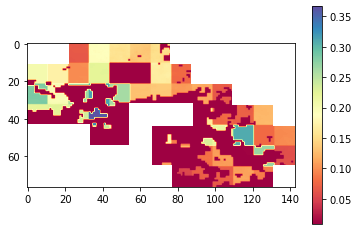

2015280


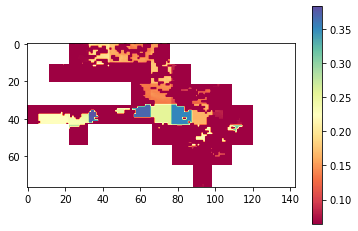

2015282


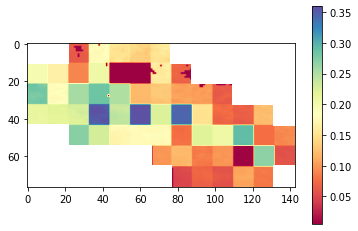

2015283


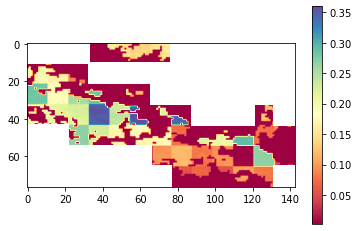

2015285


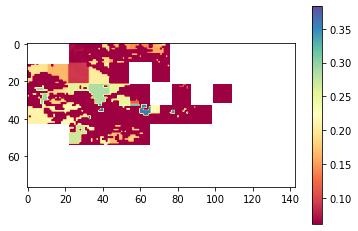

2015288


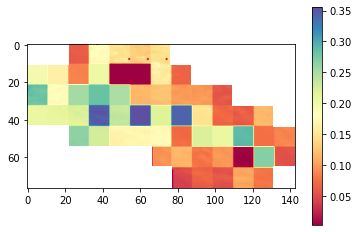

2015290


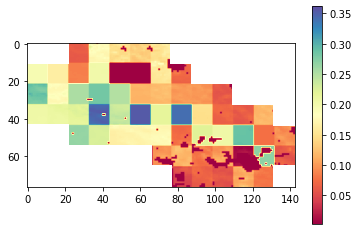

2015291


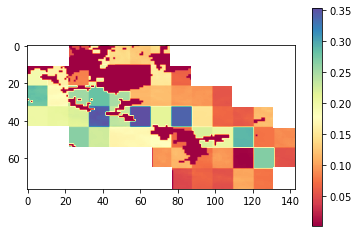

2015296


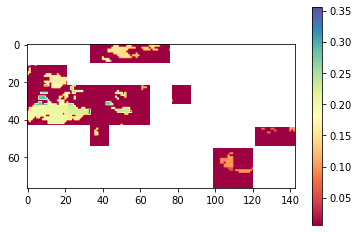

2015325


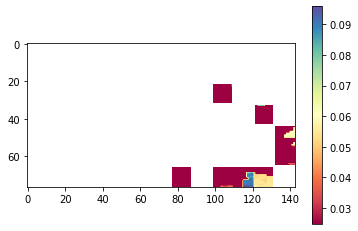

2015330


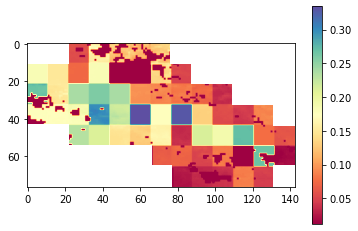

2015333


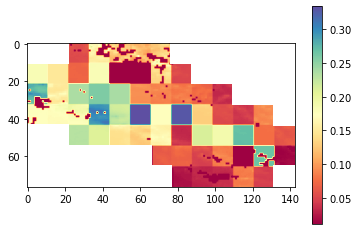

In [16]:
dates = df['date'].unique()
downscaling_grid = pred_pkg['downscaling_grid']

for date in dates:
    downscaling_array = np.ones((smapid_mat.shape[0]*11,smapid_mat.shape[1]*11))
    downscaling_array = downscaling_array * np.nan
    
    smapid = df[df['date']==date]['smapid']
    smapid_it = iter(smapid)
    cur_smapid = next(smapid_it)
    
    downscaling_id = df[df['date']==date]['downscaling_id']
    downscaling_it = iter(downscaling_id)
    cur_downscaling = next(downscaling_it)
    
    print(date)
    for i in range(smapid_mat.shape[0]):
        for j in range(smapid_mat.shape[1]):
            if(smapid_mat[i][j]==cur_smapid):
                downscaling_array[i*11:(i+1)*11, j*11:(j+1)*11] = downscaling_grid[cur_downscaling]
                try:
                    cur_smapid = next(smapid_it)
                    cur_downscaling = next(downscaling_it)
                except StopIteration:
                    break
    plt.imshow(downscaling_array, cmap='Spectral', vmin=np.min(downscaling_array[downscaling_array>0]))
    plt.colorbar()
    plt.show()